In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [33]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [34]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["smoking_history"] = le.fit_transform(df["smoking_history"])

In [36]:
df["gender"] = le.fit_transform(df["gender"])

In [37]:
df.corr(method ='pearson')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


In [38]:
df.corr()['diabetes']*100

gender                   3.741110
age                     25.800803
hypertension            19.782325
heart_disease           17.172685
smoking_history          9.428997
bmi                     21.435741
HbA1c_level             40.066031
blood_glucose_level     41.955800
diabetes               100.000000
Name: diabetes, dtype: float64

<Axes: >

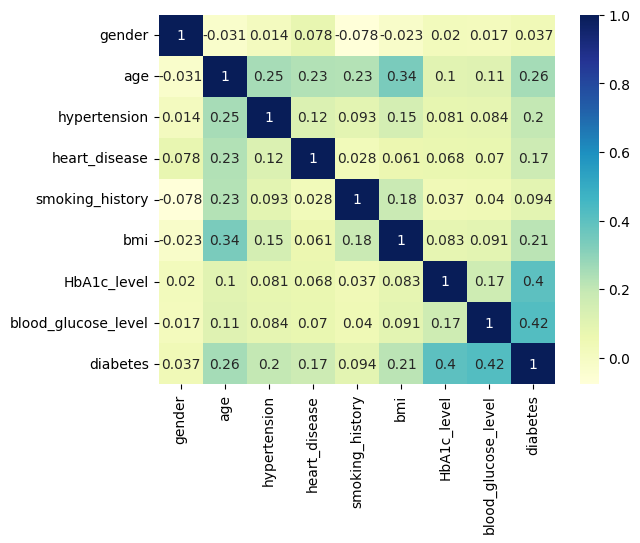

In [9]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [11]:
df.smoking_history.value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

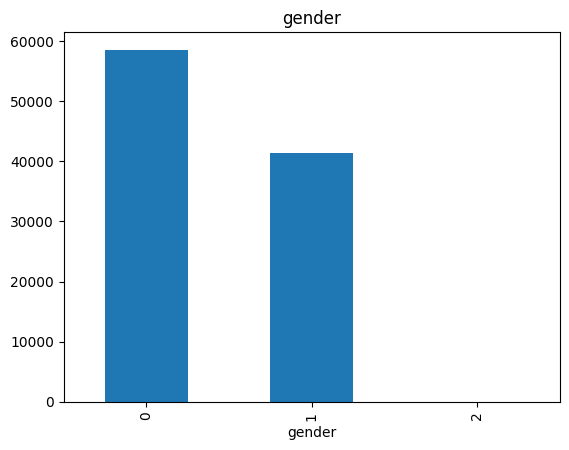

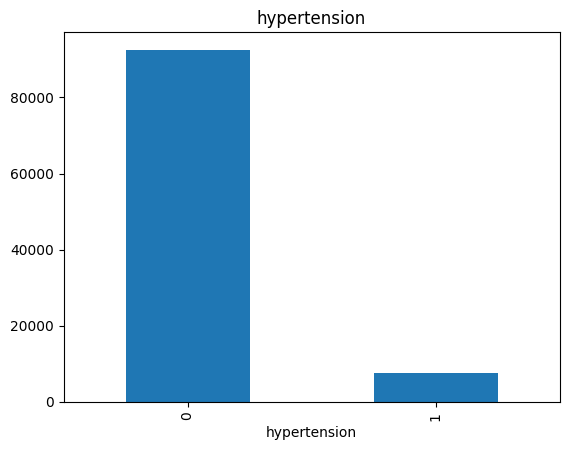

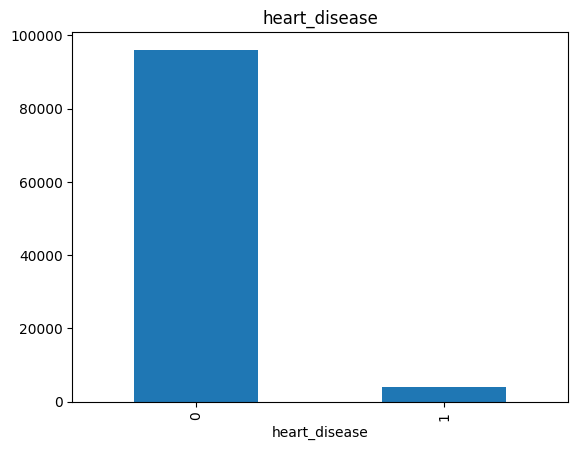

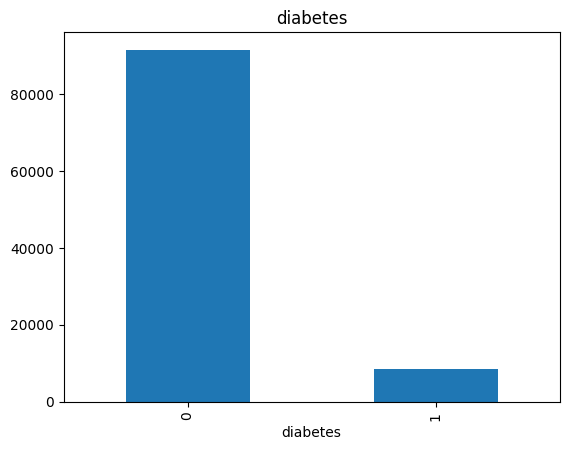

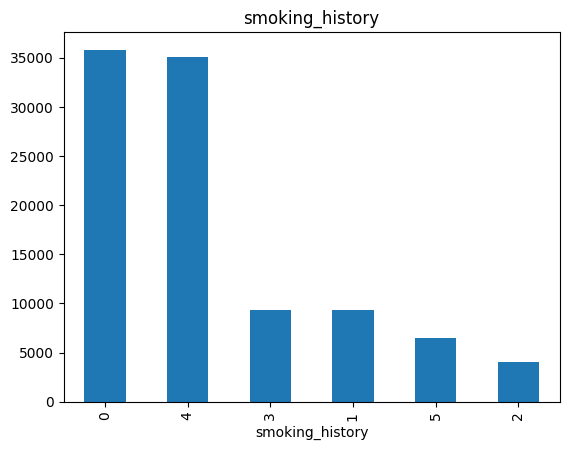

In [12]:
category1 = ["gender","hypertension","heart_disease","diabetes","smoking_history"]
for c in category1:
    df[c].value_counts().plot(kind='bar');
    plt.title(c)
    plt.show()

In [13]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


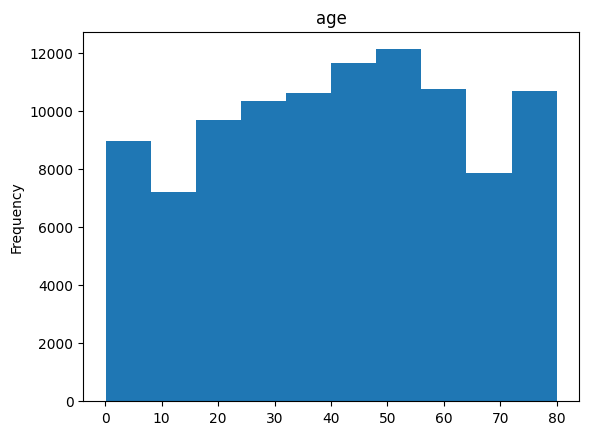

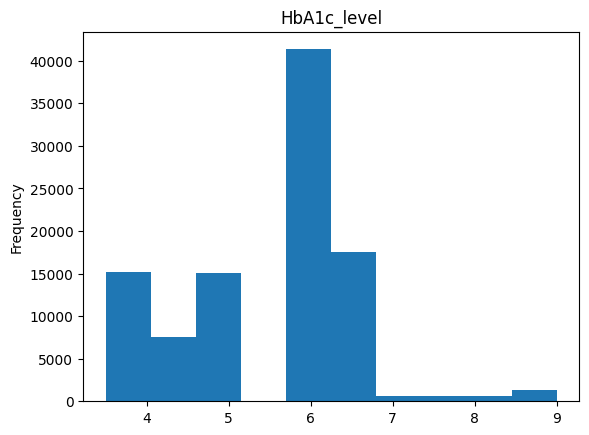

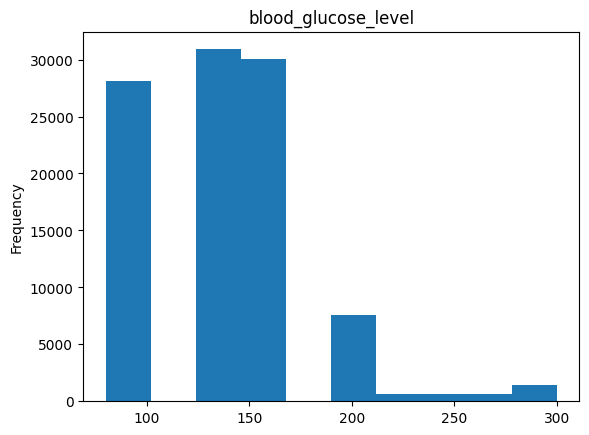

In [14]:
numericVar = ["age","HbA1c_level", "blood_glucose_level"]
for n in numericVar:
    df[n].plot(kind='hist')
    plt.title(n)
    plt.show()

In [15]:
l=["age","bmi","HbA1c_level","blood_glucose_level"]
for n in l:
  q1=df[n].quantile(0.25)
  q3=df[n].quantile(0.75)
  iqr = q3 - q1
  upper=q1-1.5*iqr
  lower=q3+1.5*iqr
  print("The value of upper bound is:",round(upper))
  print("The value of lower bound is:",round(lower))
  clean_data=df[~((df[n]<(upper))  |  (df[n]>(lower)))]
  clean_data

The value of upper bound is: -30
The value of lower bound is: 114
The value of upper bound is: 15
The value of lower bound is: 39
The value of upper bound is: 3
The value of lower bound is: 8
The value of upper bound is: 12
The value of lower bound is: 248


In [16]:
df=clean_data

In [17]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


<Axes: >

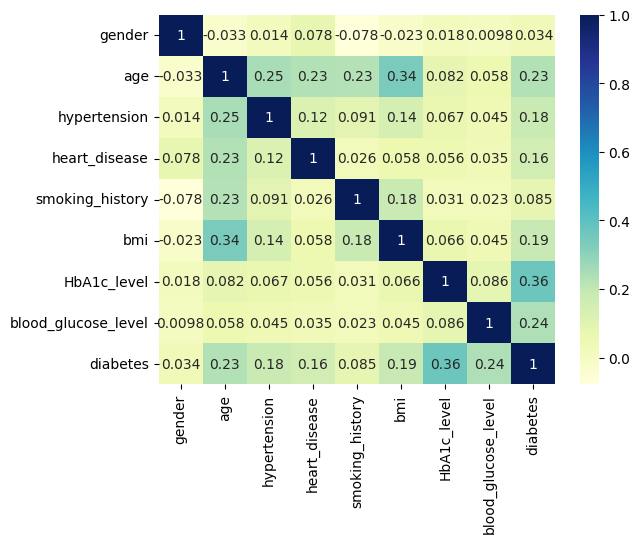

In [18]:
sns.heatmap(clean_data.corr(),annot=True,cmap="YlGnBu")

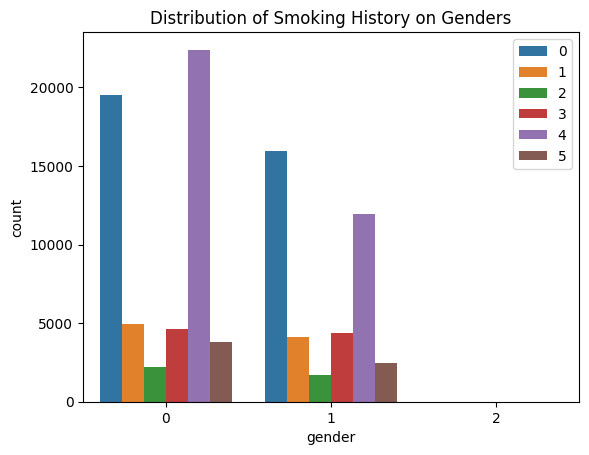

In [19]:
sns.countplot(x = "gender", data = clean_data, hue = "smoking_history")
plt.legend(loc = "upper right")
plt.title("Distribution of Smoking History on Genders")
plt.show()

In [20]:
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()

C:\Users\ummad\AppData\Local\Temp\ipykernel_15232\1539523601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]  / df[column].abs().max()


In [21]:
x = df.drop("diabetes", axis = 1)
y = df["diabetes"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [23]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9591690910018884

In [24]:
model2 = SVC(random_state=1)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.958811820548155

In [25]:
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9585566273669167

In [53]:
model4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
accuracy_score(y_test, y_pred)*100

96.84581227989588

In [27]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [29]:
pickle.dump(model4,open('model4.pkl','wb'))
model=pickle.load(open('model4.pkl','rb'))